In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
from PIL import Image
import os

In [3]:
def get_image(image_path):
    """
    This function takes the address of the image as input and returns the pixesl values of the image
    """
    image = Image.open(image_path, "r").convert('RGB')
    image = image.resize((300 ,300))
    width, height = image.size
    pixel_values = list(image.getdata())
    if image.mode == "RGB":
        channels = 3
    elif image.mode == "L":
        channels = 1
    else:
        print("Unknown mode: %s" % image.mode)
        return None
    pixel_values = np.array(pixel_values).reshape((height, width, channels))
    return pixel_values

In [4]:
a = []
b = []
m = {"Bacteria": 0, "Normal": 1, "Fungi": 2, "Nematodes": 3, "Virus": 4}

for dirname, _, filenames in os.walk('D:/Leaf machine/Datasets'):
    for filename in filenames:
        s = str(os.path.join(dirname, filename))
        img = get_image(s)
        a.append(img)
        
        # Check if the key exists before accessing it
        class_label = m.get(dirname.split('\\')[-1], -1)
        
        # Append -1 if the key is not found, you can change the default value to suit your needs.
        b.append(class_label)
        
        # print(b[-1])
        # plt.imshow(img)
        # plt.show()
        # break


In [5]:
a = np.array(a, dtype='float32')
b = np.array(b)

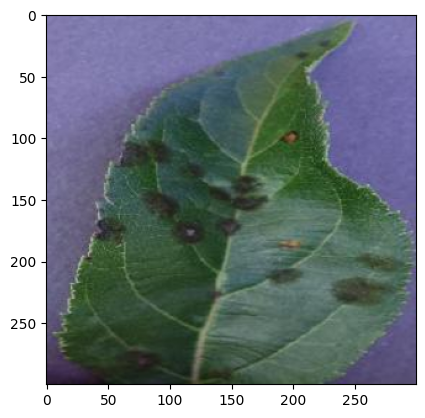

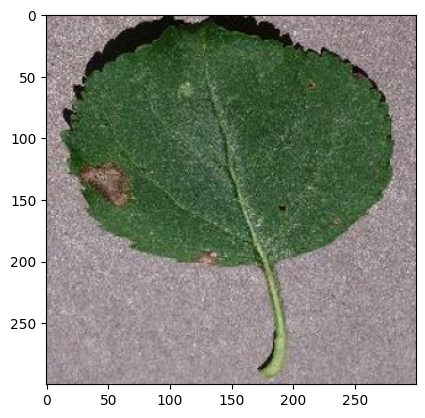

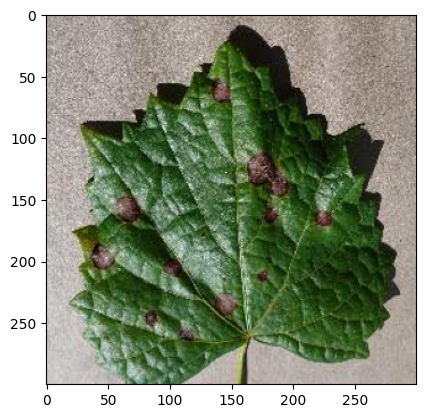

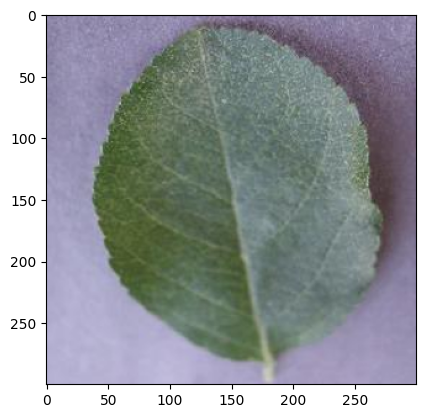

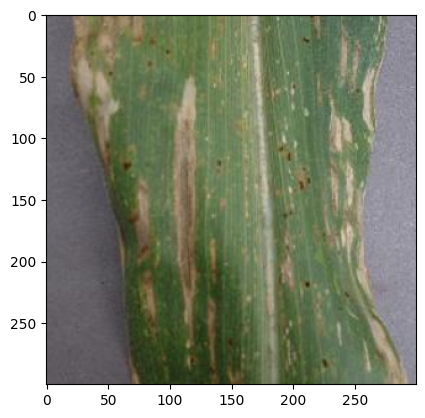

In [6]:
for dirname, _, filenames in os.walk('D:/Leaf machine/Datasets'):
    for filename in filenames:
        s = str(os.path.join(dirname, filename))
        img = get_image(s)
        plt.imshow(img)
        plt.show()
        break

In [7]:
from sklearn.model_selection import train_test_split
import tensorflow.keras
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten
from tensorflow.keras import Sequential

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 150, 150, 256)     3328      
                                                                 
 conv2d_1 (Conv2D)           (None, 75, 75, 128)       131200    
                                                                 
 flatten (Flatten)           (None, 720000)            0         
                                                                 
 dense (Dense)               (None, 256)               184320256 
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 dense_2 (Dense)             (None, 64)                8256      
                                                                 
 dense_3 (Dense)             (None, 5)                 3

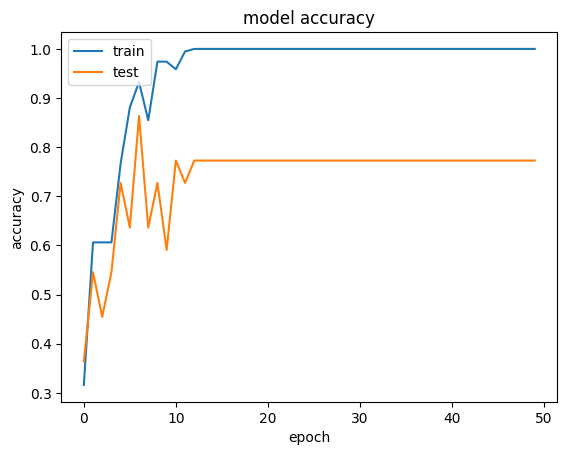

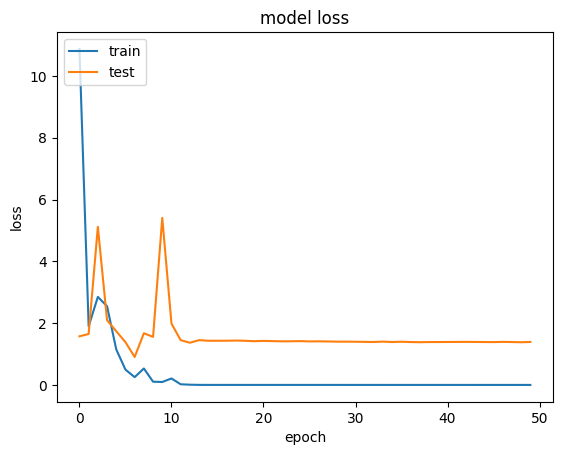

1/1 [==============================] - 1s 1s/step - loss: 1.6152 - accuracy: 0.7500


[1.6151827573776245, 0.75]

In [8]:
X = a
y = b
X/=255
X_train,X_val, y_train, y_val = train_test_split(X, y, test_size=0.1)
model = Sequential()
model.add(Conv2D(256, 2, 2, input_shape=X[0].shape))
model.add(Conv2D(128, 2, 2))
# model.add(MaxPool2D((2,2)))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(5, activation='softmax'))

model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model.summary()

history = model.fit(X_train, y_train, epochs=50, batch_size=5, validation_split=0.1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
model.evaluate(X_val, y_val)

In [9]:
model.save('D:/Leaf machine/model.h5')